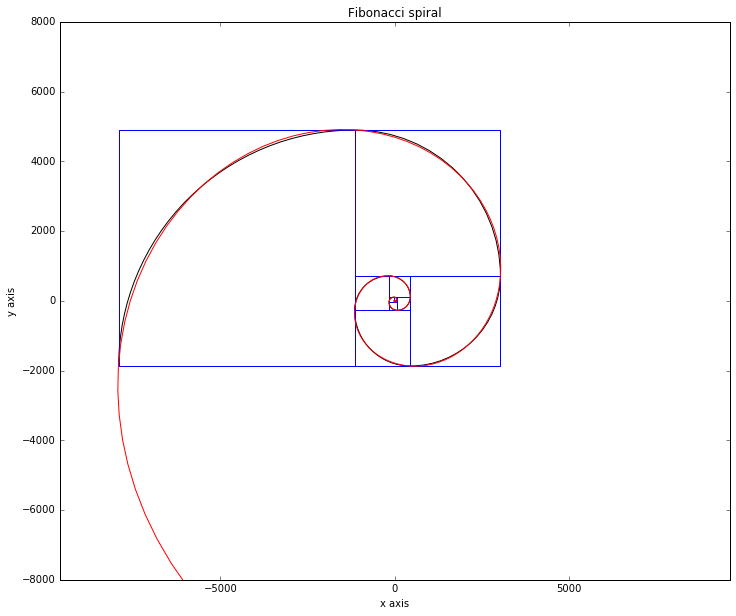

In [1]:
# This program is intended to draw squares corresponding to the Fibonacci sequence 0, 1, 1, 2, 3, 5, 8, ...
#   and inscribe circular arcs so as to approximate (and then really draw) a logarithmic spiral.

# make plots inline (so that they do not pop-out)
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

pi = np.pi

def dtr(a):
    return a*pi/180.

def rtd(a):
    return a*180./pi

def DrawClosedNgon(axis, x, y, c):
    if len(x) < 2: return
    xl = []
    yl = []
    for i in range(len(x)):
        xl.append(x[i])
        yl.append(y[i])
    xl.append(x[0])
    yl.append(y[0])
    axis.plot(xl, yl, color=c)
    return

# Draw a spiral of the form r = a * e^{b * theta}
def DrawLogSpiral(axis, x0, y0, a, b, theta0, theta1, dTheta, c):
    nThetas = int((theta1 - theta0)/dTheta + 1)
    x=[x0]
    y=[y0]
    for i in range(nThetas):
        theta = float(i)*dTheta + theta0
        r = a*np.exp(b*theta)
        x.append(r*np.cos(theta) + x0)
        y.append(r*np.sin(theta) + y0)
    axis.plot(x, y, color=c)
    return


fig, ax = plt.subplots(figsize=(12,10))
ax.axis('equal')


# How To note...
# ax.set_xlim(-7, 7)
# ax.set_ylim(-7, 7)

limit_setter = 8000.
ax.set(xlim=(-limit_setter, limit_setter), ylim=(-limit_setter,limit_setter))
ax.set(xlabel='x axis', ylabel = 'y axis', title='Fibonacci spiral')

colorScheme = 0
colorSelect = [
    [['blue','cyan','cyan','blue'],['red','orange','orange','red']], 
    [['blue','cyan','green','black'],['none','none','none','none']], 
    [['none','none','none','none'],['red','orange','orange','red']]  
    ]

# u[perm=0,1,2,3][step=0,1,2,3],[coord=0,1 for x,y] (but never use step = 3 which just returns to start of box
u = [[[1,0],[0,1],[-1,0],[0,-1]],[[0,1],[-1,0],[0,-1],[1,0]],[[-1,0],[0,-1],[1,0],[0,1]],[[0,-1],[1,0],[0,1],[-1,0]]]
th1 = [0.0, pi/2., pi, 3.*pi/2.]
th2 = [pi/2., pi, 3.*pi/2., 2.*pi]

# start at (0, 1) heading down towards (0, 0). Each new square we jump ahead two vertices and increase our
#   heading permutation index by 1 (mod 4). 
uperm = 3

a = 0
b = 1
cx = 0.
cy = 1.
for i in range(20):
    x = [cx]
    y = [cy]
    box = b
    for j in range(3):
        x.append(x[j] + b*u[uperm][j][0])
        y.append(y[j] + b*u[uperm][j][1])

    # Draw the next square        
    DrawClosedNgon(ax, x, y, 'blue')

    # Inscribe an arc: width=height=box makes it circular (these are diameters), angle does not matter (no ellipticity to rotate)
    #   theta1 and theta2 define the bounds of the arc.
    angIndex = (uperm-1)%4
    ax.add_patch(Arc([x[3],y[3]], width=box*2, height=box*2, angle = 0.0, theta1=rtd(th1[angIndex]), theta2=rtd(th2[angIndex]), fill=False))

    # now advance everything
    cx = x[2]
    cy = y[2]
    uperm += 1
    if uperm > 3: uperm = 0
    a_tmp = a
    a = b
    b = b + a_tmp

DrawLogSpiral(ax, 0.7, 1.0, 1.3131, .3063489, -pi, 12.0*pi, pi/40., 'red')

plt.show()
